In [1]:
import warnings
warnings.filterwarnings(action='ignore') 

import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/titanic.csv")

In [3]:
#EDA과정

In [4]:
df.head()
df.columns #컬럼으로 분석해야해서 확인 = 퓨처엔지니어??
df.shape #전처리 전 확인
df.PassengerId.value_counts() #분포도확인(필요한 컬럼인가 확인) >> 독립변수로써의 가치 없음 확인
df.Pclass.value_counts() #name은 가족확인 가능하지만 숫자로 변환해야하니 지금은 안씀
df.SibSp.value_counts()
df.value_counts() #영향미치는 독립변수 정하기: Pclass, Sex, Age, SibSp, Parch, Fare, Cabin, Embarked 쓸거야 정함 / Survived종속변수

data = df[["Pclass","Sex","Age","SibSp","Parch","Fare","Cabin","Embarked","Survived"]]
featuer_cols = ["Pclass","Sex","Age","SibSp","Parch","Fare","Cabin","Embarked"]
target_cols = ["Survived"]

In [5]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,female,26.0,0,0,7.9250,NaN,S,1
3,1,female,35.0,1,0,53.1000,C123,S,1
4,3,male,35.0,0,0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S,0
887,1,female,19.0,0,0,30.0000,B42,S,1
888,3,female,NaN,1,2,23.4500,NaN,S,0
889,1,male,26.0,0,0,30.0000,C148,C,1


In [6]:
#데이터 전처리

In [7]:
#1. 확인: 데이터 형태 확인

In [8]:
data.dtypes #obj를 numeric타입으로 바꿔야 하는거 확인: 1.Lable 인코딩 2.OneHot 인코딩
data.head()

#정수로 바꿔줌 0,1,2 ..., 
#data.Embarked.unique()
#np.where(data.Embarked == 'S',2,np.where(data.Embarked==''))

#Nan값 처리
data.isna().sum() #빈값찾기 null, na, Nan # drop(행(변수)/열(데이터) 중 드롭), inputation(채워넣기) 둘 중 선택 

#cabin은 열 날리기, embarked 행 날리기, Age(중요한거라서)채워넣기 로 결정

###Embarked 는 row제거
data = data.loc[~data.Embarked.isna(),:] #.isna().sum() #data.loc[~data.Embarked.isna(),:].shape

###Cabin은 column제거
#방법1: data=data.iloc[:,["Pclass","Sex","Age","SibSp","Parch","Fare","Cabin"]]
#방법2
data.drop("Cabin",axis=1,inplace=True)

###Age는 imputation
#방법1: data.loc[data.Age.isna(),"Age"] = data.Age.mean()
#방법2
data.Age.fillna(data.Age.mean(),inplace=True) #data.isna().sum() #제대로 됐는지 확인 #data.info()

In [9]:
#data.dtypes
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
newEmbarked = np.where(X.Embarked == X.Embarked.unique()[0],0, 
         np.where(X.Embarked == X.Embarked.unique()[1],1
                 ,2)) #'S', 'C', 'Q' 를 0,1,2 수치로 만들기
newSex = np.where(X.Sex == X.Sex.unique()[0],0,1)

In [10]:
X.drop(["Sex","Embarked"],axis=1,inplace=True) #조인 인덱스 안맞을 수 있으니 조심
X["Sex"] = newSex
X["Embarked"] = newEmbarked

In [11]:
#학습모듈 만들기

In [12]:
from sklearn. linear_model import LogisticRegression

In [13]:
yjh = LogisticRegression() #모델생성

In [14]:
#학습
yjh.fit(X,y)

LogisticRegression()

In [15]:
#평가
###Accuracy: 예측값과 실제값의 차이 두 값이 같음(1), 다름(0)
y_hat = yjh.predict(X) #예측값
y #실제값
y_hat == y #True False
sum(y_hat == y) / len(y_hat) #나오는 값이 좋은건지 안좋은건지 모름  0.8 = 80%맞춤
sum(y_hat==y) / len(y) 

0.8031496062992126

In [16]:
# 좋은건지 보려면 
# train, test , validation 나눠서 다시 돌려보기 6:2:2 , 두개로 나눌 땐 8:2
# 현상 알아보기 위해 = ML 

In [17]:
### train test 분리 8:2 #섞는게 좋아, 섞어서 분리하는 법 
new_index = np.random.choice(X.index,X.index.size,replace=False) #섞기(를, 몇개뽑=길이, 뽑은거 또 안뽑)

#안섞고 결과보면 같은 결과만 나옴 
tr_idx = new_index[:int(new_index.size*0.8)] #8 대
te_idx = new_index[int(new_index.size*0.8):] #2 로 나눠짐

X_train = X.loc[tr_idx,:]
X_test = X.loc[te_idx,:]
y_train = y[tr_idx]
y_test = y[te_idx]

In [18]:
#다시 데이터 만들기
yjh = LogisticRegression()
yjh.fit(X_train, y_train)

#다시 평가
y_hat = yjh.predict(X_test) #예측값
y #실제값
sum(y_hat==y_test) / len(y_test) 

0.797752808988764

In [19]:
#까지 원리 체크
###인덱스 다음거 순서로 5번 섞기(2:8) 자동검증 함수 만들기, tool 안쓰고

#for i in range(5):

In [20]:
#평균구하기(8:2나누는 부분 대신)
from sklearn.model_selection import cross_val_score
cross_val_score(yjh,X,y,cv=5).mean()

0.7930616390528789

In [21]:
#null확인
df.loc[df.Age.isna(),:]

#나이가 영향을 미친다면: #근거 찾아내기

#산 사람들의 평균을 산사람의 나이에 널고
df.groupby("Survived").mean().Age 
new_data = df.groupby(["Survived","Sex"]).mean().Age.reset_index()

#죽은 사람들의 평균을 죽은사람의 나이에 넣기
data.loc[(data.Survived==0) & (data.Sex=='female') & (data.Age.isna()),"Age"] = new_data.loc[(new_data.Survived==0) & (new_data.Sex=='female'),"Age"].values[0]
data.loc[(data.Survived==1) & (data.Sex=='female') & (data.Age.isna()),"Age"] = new_data.loc[(new_data.Survived==1) & (new_data.Sex=='female'),"Age"].values[0]
data.loc[(data.Survived==0) & (data.Sex=='male') & (data.Age.isna()),"Age"] = new_data.loc[(new_data.Survived==0) & (new_data.Sex=='male'),"Age"].values[0]
data.loc[(data.Survived==1) & (data.Sex=='male') & (data.Age.isna()),"Age"] = new_data.loc[(new_data.Survived==1) & (new_data.Sex=='male'),"Age"].values[0]

data.reset_index(inplace=True)
data.drop("index",axis=1,inplace=True)

#나이와 성별 관계 확인
# df.groupby(["Survived","Sex"]).mean().Age 
# df.groupby(["Survived","Sex"]).mean().Age.index #인덱스
# df.groupby(["Survived","Sex"]).mean().Age.reset_index() #컬럼

#다른 모델 만들어서 나이 예측하기

(array([36., 19., 63., 65., 52., 24., 21.,  9.,  0.,  1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

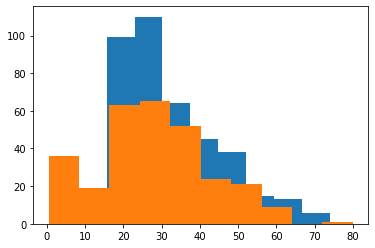

In [22]:
import matplotlib.pyplot as plt
plt.hist(df.loc[df.Survived == 0, "Age"])
plt.hist(df.loc[df.Survived == 1, "Age"])

In [23]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

new_index = np.random.choice(X.index, X.index.size, replace=False)
tr_idx = new_index[:int(new_index.size*0.8)]
te_idx = new_index[int(new_index.size*0.8):]

newEmbarked = np.where(X.Embarked == X.Embarked.unique()[0],0,
                       np.where(X.Embarked==X.Embarked.unique()[1],1,2))
newSex = np.where(X.Sex == X.Sex.unique()[0],0,1)

X.drop(["Sex","Embarked"],axis=1,inplace=True)
X["Sex"] = newSex
X["Embarked"] = newEmbarked

In [24]:
#카테고리밸류를 바꿔주기: OneHot 
data.shape

logreg = LogisticRegression()
cross_val_score(logreg,X,y,cv=5).mean()

#===============
# newPclass = np.zeros((data.Pclass.size,data.Pclass.unique().size))
# i=0
# newPclass[i,data.Pclass[i]-1] = 1
#===============

#===를 반복문으로 만들기
newPclass = np.zeros((data.Pclass.size,data.Pclass.unique().size))
for k,v in enumerate(data.Pclass):
    newPclass[k,v-1] = 1
newPclass

#data.SibSp.value_counts()
newSipSp = np.where(data.SibSp == 0,0,1)

#mmScaledFare = (data.Fare - data.Fare.mean()) / (data.Fare.max() - data.Fare.min())
newCol = np.c_[newPclass,newSipSp]

newData = pd.concat([pd.DataFrame(newCol),data],axis=1)

In [25]:
###새 데이터로 만들기

df = pd.read_csv("data/titanic.csv")
# data = df[["Pclass","Sex","Age","SibSp","Parch","Fare","Cabin","Embarked","Survived"]]
# data.drop('Cabin',axis=1,inplace=True)
# data = data.loc[~data.Embarked.isna(),:] #null확인

#산 사람들의 평균을 산사람의 나이에 널고
new_data = df.groupby(["Survived","Sex"]).mean().Age.reset_index()

#죽은 사람들의 평균을 죽은사람의 나이에 넣기
data.loc[(data.Survived==0) & (data.Sex=='female') & (data.Age.isna()),"Age"] = new_data.loc[(new_data.Survived==0) & (new_data.Sex=='female'),"Age"].values[0]
data.loc[(data.Survived==1) & (data.Sex=='female') & (data.Age.isna()),"Age"] = new_data.loc[(new_data.Survived==1) & (new_data.Sex=='female'),"Age"].values[0]
data.loc[(data.Survived==0) & (data.Sex=='male') & (data.Age.isna()),"Age"] = new_data.loc[(new_data.Survived==0) & (new_data.Sex=='male'),"Age"].values[0]
data.loc[(data.Survived==1) & (data.Sex=='male') & (data.Age.isna()),"Age"] = new_data.loc[(new_data.Survived==1) & (new_data.Sex=='male'),"Age"].values[0]

data.reset_index(inplace=True)
data.drop("index",axis=1,inplace=True)

data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.000000,1,0,7.2500,S,0
1,1,female,38.000000,1,0,71.2833,C,1
2,3,female,26.000000,0,0,7.9250,S,1
3,1,female,35.000000,1,0,53.1000,S,1
4,3,male,35.000000,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
884,2,male,27.000000,0,0,13.0000,S,0
885,1,female,19.000000,0,0,30.0000,S,1
886,3,female,29.642093,1,2,23.4500,S,0
887,1,male,26.000000,0,0,30.0000,C,1


In [26]:
# #나이 구간으로 나누기
# plt.boxplot(data.Age)
# plt.hist(data.Age)

#상대구간구하기, 절대구간 구하기
np.percentile(data.Age,75)

35.0

In [27]:
newPclass = np.zeros((data.Pclass.size, data.Pclass.unique().size))
for k,v in enumerate(data.Pclass):
    newPclass[k,v-1] = 1
newPclass
newSibSp = np.where(data.SibSp == 0,0, 1)
newCol = np.c_[newPclass,newSibSp]
newData = pd.concat([pd.DataFrame(newCol),data],axis=1)
newData

,0,1,2,3,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,0.0,0.0,1.0,1.0,3,male,22.000000,1,0,7.2500,S,0
1,1.0,0.0,0.0,1.0,1,female,38.000000,1,0,71.2833,C,1
2,0.0,0.0,1.0,0.0,3,female,26.000000,0,0,7.9250,S,1
3,1.0,0.0,0.0,1.0,1,female,35.000000,1,0,53.1000,S,1
4,0.0,0.0,1.0,0.0,3,male,35.000000,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,1.0,0.0,0.0,2,male,27.000000,0,0,13.0000,S,0
885,1.0,0.0,0.0,0.0,1,female,19.000000,0,0,30.0000,S,1
886,0.0,0.0,1.0,1.0,3,female,29.642093,1,2,23.4500,S,0
887,1.0,0.0,0.0,0.0,1,male,26.000000,0,0,30.0000,C,1


In [28]:
#위에꺼 다시 해주기

X = newData.iloc[:,:-1]
y = newData.iloc[:,-1]

new_index = np.random.choice(X.index, X.index.size, replace=False)
tr_idx = new_index[:int(new_index.size*0.8)]
te_idx = new_index[int(new_index.size*0.8):]

newEmbarked = np.where(X.Embarked == X.Embarked.unique()[0],0,
                       np.where(X.Embarked==X.Embarked.unique()[1],1,2))
newSex = np.where(X.Sex == X.Sex.unique()[0],0,1)

X.drop(["Sex","Embarked"],axis=1,inplace=True)
X["Sex"] = newSex
X["Embarked"] = newEmbarked

logreg = LogisticRegression()
cross_val_score(logreg,X,y,cv=5).mean()

#
df = pd.read_csv("data/titanic.csv")
data = df[['Pclass','Sex','SibSp','Parch','Fare','Cabin','Embarked','Age','Survived']]
data.drop('Cabin',axis=1,inplace=True)
data = data.loc[~data.Embarked.isna(),:]

new_data = df.groupby(["Survived","Sex"]).mean().Age.reset_index()
data.loc[(data.Survived==0) & (data.Sex=='female') & (data.Age.isna()),"Age"] = new_data.loc[(new_data.Survived==0) & (new_data.Sex=='female'), "Age"].values[0]
data.loc[(data.Survived==1) & (data.Sex=='female') & (data.Age.isna()),"Age"] = new_data.loc[(new_data.Survived==1) & (new_data.Sex=='female'), "Age"].values[0]
data.loc[(data.Survived==0) & (data.Sex=='male') & (data.Age.isna()),"Age"] = new_data.loc[(new_data.Survived==0) & (new_data.Sex=='male'), "Age"].values[0]
data.loc[(data.Survived==1) & (data.Sex=='male') & (data.Age.isna()),"Age"] = new_data.loc[(new_data.Survived==1) & (new_data.Sex=='male'), "Age"].values[0]

data.reset_index(inplace=True)
data.drop("index",axis=1,inplace=True)
mmScaledFare = (data.Fare-data.Fare.mean())/(data.Fare.max() - data.Fare.min())
mmScaledFare.shape

(889,)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff195332910>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff195332f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff1953325e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff1953406d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff195340a60>],
 'means': []}

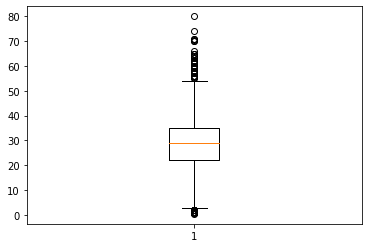

In [29]:
# newPclass = np.zeros((data.Pclass.size, data.Pclass.unique().size))
# for k,v in enumerate(data.Pclass):
#     newPclass[k,v-1] = 1
# newPclass
# newSibSp = np.where(data.SibSp == 0,0, 1)
# mmScaledFare = (data.Fare-data.Fare.mean())/(data.Fare.max() - data.Fare.min())
# newCol = np.c_[newPclass,newSibSp,mmScaledFare]
# newData = pd.concat([pd.DataFrame(newCol),data],axis=1)

X = newData.iloc[:,:-1]
y = newData.iloc[:,-1]

# new_index = np.random.choice(X.index, X.index.size, replace=False)
# tr_idx = new_index[:int(new_index.size*0.8)]
# te_idx = new_index[int(new_index.size*0.8):]

newEmbarked = np.where(X.Embarked == X.Embarked.unique()[0],0,
                       np.where(X.Embarked==X.Embarked.unique()[1],1,2))
newSex = np.where(X.Sex == X.Sex.unique()[0],0,1)

X.drop(["Sex","Embarked"],axis=1,inplace=True)
X["Sex"] = newSex
X["Embarked"] = newEmbarked

logreg = LogisticRegression()
cross_val_score(logreg,X,y,cv=5).mean()

plt.boxplot(data.Age)
# plt.hist(data.Age)
# np.percentile(data.Age,75)

In [30]:
from sklearn.cluster import KMeans

# pd.cut(data.Age, [0, np.percentile(data.Age,25), np.percentile(data.Age,75), np.percentile(data.Age,90), data.Age.max()])

#구간 만들어서 카테고리 만들기
##percentile을 사용해서 age를 그룹화
newAge = np.where(data.Age > np.percentile(data.Age,90),0,
                  np.where(data.Age > np.percentile(data.Age,75),1,
                           np.where(data.Age > np.percentile(data.Age,25),2,
                                    np.where(data.Age > np.percentile(data.Age,10),3, 4))))
#Kmeans거리상을 이용해 clustering Age를 그룹화
km = KMeans(4)
km.fit(data[["Age"]])
ageCluster = km.labels_

newAgeOh = np.zeros((newAge.size, np.unique(newAge).size))
for k,v in enumerate(newAge):
    newAgeOh[k,v] = 1
    
ageClusterOh = np.zeros((ageCluster.size, np.unique(ageCluster).size))
for k,v in enumerate(ageCluster):
    ageClusterOh[k,v] = 1

newPclass = np.zeros((data.Pclass.size, data.Pclass.unique().size))
for k,v in enumerate(data.Pclass):
    newPclass[k,v-1] = 1
    
#데이터 묶어주기
newSibSp = np.where(data.SibSp == 0,0, 1)
mmScaledFare = (data.Fare - data.Fare.min())/(data.Fare.max() - data.Fare.min())
newEmbarked = np.where(data.Embarked == data.Embarked.unique()[0],0,
                       np.where(data.Embarked == data.Embarked.unique()[1],1, 2))
newEmbarkedOh = np.zeros((newEmbarked.size, np.unique(newEmbarked).size))
for k,v in enumerate(newEmbarked):
    newEmbarkedOh[k,v] = 1
    
newSex = np.where(data.Sex == data.Sex.unique()[0],0, 1)

newCol = np.c_[newPclass, newSibSp, mmScaledFare, newAgeOh, ageClusterOh, newEmbarkedOh, newSex]
newData = pd.concat([pd.DataFrame(newCol),data],axis=1)
newData.drop(['Age','Sex','Embarked','Fare','Pclass'],axis=1,inplace=True)
# newData['Sex'] = newSex
# newData['Embarked'] = newEmbarked
newData

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,SibSp,Parch,Survived
0,0.0,0.0,1.0,1.0,0.014151,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0
1,1.0,0.0,0.0,1.0,0.139136,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0,1
2,0.0,0.0,1.0,0.0,0.015469,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,1
3,1.0,0.0,0.0,1.0,0.103644,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,1
4,0.0,0.0,1.0,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,1.0,0.0,0.0,0.025374,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0
885,1.0,0.0,0.0,0.0,0.058556,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,1
886,0.0,0.0,1.0,1.0,0.045771,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,2,0
887,1.0,0.0,0.0,0.0,0.058556,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1


In [31]:
#이건 왜 쓰지??
X = newData.iloc[:,:-1]
y = newData.iloc[:,-1]

# X.drop(["Sex","Embarked"],axis=1,inplace=True)
# X["Sex"] = newSex
# X["Embarked"] = newEmbarked

logreg = LogisticRegression()
cross_val_score(logreg,X,y,cv=5).mean()

0.80207579508665

In [32]:
from sklearn.ensemble import RandomForestClassifier

logreg = LogisticRegression()
rf_model = RandomForestClassifier()
cross_val_score(rf_model,X,y,cv=5).mean()

logreg = LogisticRegression()
logreg.fit(X,y)

np.abs((logreg.predict_proba(X)[:,0] - logreg.predict_proba(X)[:,1]))
logreg.predict(X)[np.abs((logreg.predict_proba(X)[:,0] - logreg.predict_proba(X)[:,1])) <= 0.1]

logreg.predict_proba(X)[2,:]
logreg.predict(X)[2]

y[2]

1

In [33]:
rf_model.fit(X,y)
rf_model.predict_proba(X.loc[[2],:])
rf_model.predict(X.loc[[2],:])
logreg.predict_proba(X.loc[[2],:])

array([[0.53312047, 0.46687953]])

In [34]:
from sklearn.svm import SVC
svm_model = SVC(probability=True)
svm_model.fit(X,y)
svm_model.predict_proba(X.loc[[2],:])

array([[0.5595774, 0.4404226]])

In [35]:
#나이와 성별
data.iloc[[2],:]
rf_model.feature_importances_[np.argmax(rf_model.feature_importances_)]
X

y_hat = yjh.predict(X_test) 
sum(y_hat == y_test)/len(y_test)

new_df = df.loc[df.Fare > 0,["Fare","Survived"]]

In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(new_df[['Fare']],new_df.Survived)
lm.intercept_
sum(np.where(lm.predict(new_df[['Fare']]) >= 0.5,1, 0) == new_df.Survived)/new_df.Survived.size


0.6655251141552512

In [37]:
#이름에서 생존 연관성 찾기

In [38]:
df = pd.read_csv("data/titanic.csv")

data = df[['Pclass','Sex','SibSp','Parch','Fare','Cabin','Embarked','Age','Survived','Name']]
feature_cols = ["Pclass","Sex","SibSp","Parch","Fare","Cabin","Embarked","Age"]
target_col =["Survived"]

data.drop('Cabin',axis=1,inplace=True)
data = data.loc[~data.Embarked.isna(),:]

new_data = df.groupby(["Survived","Sex"]).mean().Age.reset_index()
data.loc[(data.Survived==0) & (data.Sex=='female') & (data.Age.isna()),"Age"] = new_data.loc[(new_data.Survived==0) & (new_data.Sex=='female'), "Age"].values[0]
data.loc[(data.Survived==1) & (data.Sex=='female') & (data.Age.isna()),"Age"] = new_data.loc[(new_data.Survived==1) & (new_data.Sex=='female'), "Age"].values[0]
data.loc[(data.Survived==0) & (data.Sex=='male') & (data.Age.isna()),"Age"] = new_data.loc[(new_data.Survived==0) & (new_data.Sex=='male'), "Age"].values[0]
data.loc[(data.Survived==1) & (data.Sex=='male') & (data.Age.isna()),"Age"] = new_data.loc[(new_data.Survived==1) & (new_data.Sex=='male'), "Age"].values[0]

data.reset_index(inplace=True)
data.drop("index",axis=1,inplace=True)



##persentile을 사용해서 Age를 그룹화 시킴
# pd.cut(data.Age, [0, np.percentile(data.Age,25), np.percentile(data.Age,75), np.percentile(data.Age,90), data.Age.max()])
newAge = np.where(data.Age > np.percentile(data.Age,90),0,
                  np.where(data.Age > np.percentile(data.Age,75),1,
                           np.where(data.Age > np.percentile(data.Age,25),2,
                                    np.where(data.Age > np.percentile(data.Age,10),3, 4))))

# #clustering Age를 그룹화 시킴
# km = KMeans(4)
# km.fit(data[["Age"]])
# ageCluster = km.labels_

# ageClusterOh = np.zeros((ageCluster.size, np.unique(ageCluster).size))
# for k,v in enumerate(ageCluster):
#     ageClusterOh[k,v] = 1

newAgeOh = np.zeros((newAge.size, np.unique(newAge).size))
for k,v in enumerate(newAge):
    newAgeOh[k,v] = 1

newPclass = np.zeros((data.Pclass.size, data.Pclass.unique().size))
for k,v in enumerate(data.Pclass):
    newPclass[k,v-1] = 1

newSibSp = np.where(data.SibSp == 0,0, 1)
mmScaledFare = (data.Fare - data.Fare.min())/(data.Fare.max() - data.Fare.min())
newEmbarked = np.where(data.Embarked == data.Embarked.unique()[0],0,
                       np.where(data.Embarked == data.Embarked.unique()[1],1, 2))

newEmbarkedOh = np.zeros((newEmbarked.size, np.unique(newEmbarked).size))
for k,v in enumerate(newEmbarked):
    newEmbarkedOh[k,v] = 1
    
newSex = np.where(data.Sex == data.Sex.unique()[0],0, 1)

#결혼유무
married = np.where((data.Name.str.contains("Mrs.")) | (data.Name.str.contains("Mr.") & (data.SibSp > 0)),1, 0)

newCol = np.c_[newPclass, newSibSp, mmScaledFare, newAgeOh, newEmbarkedOh, newSex, married]
newData = pd.concat([pd.DataFrame(newCol),data],axis=1)
newData.drop(['Age','Sex','Embarked','Fare','Pclass',"Name"],axis=1,inplace=True)

df[df.Name.str.contains("Mrs")]
df[df.Name.str.contains("Nicholas")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C


In [39]:
# df.Name.str.split(" ")[0]
# 'Mr.' in df.Name.str.split(" ")[0]
# np.array(df.Name.str.split(" ")[0])[np.where(np.array(df.Name.str.split(" ")[0]) == 'Mr.')[0]+1]
np.array(df.Name.str.split(" ")[1])[np.where(np.array(df.Name.str.split(" ")[1]) == 'Mrs.')[0]+1]

for i in range(len(df.Name)):
    x = np.array(df.Name.str.split(" ")[i])[np.where(np.array(df.Name.str.split(" ")[i]) == 'Mrs.')[0]+1]
    # print(x)
    
# np.where((df.Name.str.contains("Mrs")) | (df.Name.str.contains("Mr.") & df.SibSp > 0)),1, 0
logreg = LogisticRegression()
rf_model = RandomForestClassifier()
svm_model = SVC(probability=True)

svm_model.fit(X,y)
svm_model.predict_proba(X.loc[[2],:])

cross_val_score(logreg,X,y,cv=5).mean()

0.80207579508665

In [40]:
rf_model = RandomForestClassifier()
cross_val_score(rf_model,X,y,cv=5).mean()
rf_model.fit(X,y)
rf_model.predict_proba(X.loc[[2],:])

array([[0.48616667, 0.51383333]])

In [41]:
#vote
rf_model = RandomForestClassifier()
svm_model = SVC(probability=True)
lr_model = LogisticRegression()

rf_model.fit(X,y)
svm_model.fit(X,y)
lr_model.fit(X,y)

rf_pr = rf_model.predict(X)
svm_pr = svm_model.predict(X)
lr_pr = lr_model.predict(X)

rf_pr = rf_model.predict_proba(X)
svm_pr = svm_model.predict_proba(X)
lr_pr = lr_model.predict_proba(X)

In [42]:
#hard vote
hard_vote = np.where((rf_pr + svm_pr + lr_pr) > 1,1, 0)
hard_vote_acc = sum(hard_vote == y)/y.size

rf_acc = sum(rf_pr == y)/y.size
svm_acc = sum(svm_pr == y)/y.size
lr_acc = sum(lr_pr == y)/y.size

print('rf :', rf_acc)
print('svm :', svm_acc)
print('lr :', lr_acc)
print('hard_vote :', hard_vote_acc)

rf : 0.0
svm : 0.0
lr : 0.0
hard_vote : 0.0


In [43]:
rf_model.fit(X_train,y_train)
rf_model.score(X_test,y_test)

0.7808988764044944

In [44]:
#soft vote
soft_vote_result = (rf_pr + svm_pr + lr_pr)/3
soft_vote = np.array((soft_vote_result[:,0] < soft_vote_result[:,1]),dtype='int') #모든행의 0번, 모든 행의 1번
soft_vote_acc = sum(soft_vote == y)/y.size

rf_acc = sum(rf_pr == y)/y.size
svm_acc = sum(svm_pr == y)/y.size
lr_acc = sum(lr_pr == y)/y.size

print('rf :', rf_acc)
print('svm :', svm_acc)
print('lr :', lr_acc)
print('soft_vote :', soft_vote_acc)

rf : 0.0
svm : 0.0
lr : 0.0
soft_vote : 0.8807649043869517
